<a href="https://colab.research.google.com/github/zulfikarr999/32602100092_MuhammadZulfikar/blob/main/Bismilllah_SKRIPSI_TA_Chatbot_Layanan_Dental_Care_Metode_Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#akses data di googledrive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#Instalasi Paket dan mengimpor pustaka
!pip install tensorflow numpy pandas scikit-learn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import json


In [36]:
# Muat data JSON dari Google Drive
json_file_path = '/content/drive/MyDrive/Dataset/Dentalcare.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)


In [37]:
#Membuat aplikasi berbasis suara
!pip -q install speechrecognition

In [38]:
#menginstal pustaka gTTS (Google Text-to-Speech)
!pip -q install gtts

In [39]:
# impor pustaka dan modul Python
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model # Import plot_model from the correct module
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [40]:
#mengunduh dataset dan sumber daya penting yang dibutuhkan oleh pustaka Natural Language Toolkit (nltk) untuk pemrosesan bahasa alami (NLP).
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
#pemrosesan data dari file JSON (Dentalcare.json) dan mempersiapkan data untuk aplikasi pemrosesan bahasa alami (NLP) atau chatbot
with open('/content/Dentalcare.json') as content:
  data1 = json.load(content)

tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))

      if intent['tag'] not in classes:
        classes.append(intent['tag'])

  data = pd.DataFrame({"patterns":inputs, "tags":tags})



In [43]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
71,Apa itu Frenitis?,penjelasan_Frenitis
72,Bagaimana cara mencegah Frenitis?,Mencegah_Frenitis
73,Apa itu Lesi dan Ulkus Mulut?,penjelasan_Lesi dan Ulkus Mulut
74,Bagaimana cara mencegah Lesi dan Ulkus Mulut?,Mencegah_Lesi dan Ulkus Mulut


In [44]:
#menampilkan beberapa baris pertama dari DataFrame pandas yang telah dibuat.
data.head()

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting


In [45]:
#menampilkan beberapa baris terakhir dari DataFrame pandas.
data.tail()

,patterns,tags
71,Apa itu Frenitis?,penjelasan_Frenitis
72,Bagaimana cara mencegah Frenitis?,Mencegah_Frenitis
73,Apa itu Lesi dan Ulkus Mulut?,penjelasan_Lesi dan Ulkus Mulut
74,Bagaimana cara mencegah Lesi dan Ulkus Mulut?,Mencegah_Lesi dan Ulkus Mulut
75,Bagaimana cara merawat Gigi dan Mulut?,Tips merawat Gigi dan Mulut


In [46]:
#membersihkan dan memproses teks dalam kolom patterns dari DataFrame data.
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd:''.join(wrd))

In [47]:
#melakukan lemmatization pada daftar kata dan membersihkan serta mengurutkan kata-kata unik
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

76 unique lemmatized words ['(', ')', 'abs', 'afternoon', 'apa', 'aplikasi', 'atau', 'bagaimana', 'bai', 'banyak', 'berlubang', 'bro', 'bye', 'byee', 'cara', 'dadah', 'dah', 'dan', 'dentalcare', 'dentalcarebot', 'digital', 'edukasi', 'frenitis', 'gigi', 'gingvitis', 'good', 'gusi', 'hai', 'hallo', 'halo', 'hei', 'hi', 'hy', 'itu', 'jumpa', 'karies', 'kasih', 'kawan', 'kering', 'kesehatan', 'layanan', 'lesi', 'makasih', 'malam', 'manfaat', 'mencegah', 'merawat', 'morning', 'mulut', 'pagi', 'patah', 'penyakit', 'penyuluhan', 'periodontitis', 'plak', 'program', 'retak', 'saja', 'sampai', 'see', 'selamat', 'sensitivitas', 'si', 'siang', 'siapa', 'sore', 'tartar', 'teknologi', 'terima', 'thank', 'thanks', 'tinggal', 'tujuan', 'ulkus', 'xerostomia', 'you']


In [48]:
#penghapusan Duplikasi,pengurutan,danmenampilkan hasil
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

36 classes ['Dentalcarebot', 'Mau tahu Tentang penyakit gigi dan cara mencegahnya', 'Mencegah_Abses Gigi', 'Mencegah_Frenitis', 'Mencegah_Gigi Retak atau Patah', 'Mencegah_Gingvitis', 'Mencegah_Karies Gigi', 'Mencegah_Lesi dan Ulkus Mulut', 'Mencegah_Penyakit Gusi', 'Mencegah_Penyakit Mulut Kering (Xerostomia)', 'Mencegah_Plak dan Tartar', 'Mencegah_Sensitivitas Gigi', 'Tips merawat Gigi dan Mulut', 'goodbye', 'greeting', 'manfaat_Edukasi dan penyuluhan', 'manfaat_Layanan kesehatan gigi', 'manfaat_Teknologi Dentaclcare', 'penjelasan_Abses Gigi', 'penjelasan_Dentalcare', 'penjelasan_Edukasi dan penyuluhan', 'penjelasan_Frenitis', 'penjelasan_Gigi Retak atau Patah)', 'penjelasan_Gingvitis', 'penjelasan_Karies Gigi', 'penjelasan_Layanan kesehatan gigi', 'penjelasan_Lesi dan Ulkus Mulut', 'penjelasan_Penyakit Gusi', 'penjelasan_Penyakit Mulut Kering (Xerostomia)', 'penjelasan_Plak dan Tartar', 'penjelasan_Sensitivitas Gigi', 'penjelasan_Teknologi Dentalcare', 'program Dentalcare', 'program

In [49]:
#menampilkan jumlah total dokumen yang ada dalam daftar documents.
print (len(documents), "documents")

464 documents


In [50]:
#memproses teks untuk model machine learning atau deep learning
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [1, 3, 33],
 [54, 33],
 [55],
 [56],
 [34],
 [57],
 [58, 34],
 [59, 60],
 [61, 62],
 [63],
 [64, 35],
 [65],
 [66, 35],
 [36, 37],
 [67],
 [36, 37, 68],
 [1, 3, 8],
 [1, 69, 8],
 [1, 11, 12, 8],
 [12, 8, 13, 4, 14],
 [12, 8, 15, 16, 2],
 [12, 8, 17, 4, 70, 71],
 [13, 4, 14],
 [15, 16, 2],
 [17, 8],
 [1, 3, 13, 4, 14],
 [1, 11, 18, 13, 4, 14],
 [1, 3, 15, 16, 2],
 [1, 11, 18, 15, 16, 2],
 [1, 3, 17, 8],
 [1, 11, 18, 17, 8],
 [19, 2, 2, 72],
 [10, 20, 73],
 [21, 2],
 [22, 2],
 [10, 9, 23, 24],
 [2, 25, 26, 27],
 [28, 4, 29],
 [30],
 [31, 4, 32, 9],
 [1, 3, 19, 2],
 [5, 6, 7, 19, 2],
 [1, 3, 10, 20],
 [5, 6, 7, 10, 20],
 [1, 3, 38],
 [5, 6, 7, 38],
 [1, 3, 21, 2],
 [5, 6, 7, 21, 2],
 [1, 3, 22, 2],
 [5, 6, 7, 22, 2],
 [1, 3, 10, 9, 23, 24],
 [5, 6, 7, 10, 9, 23, 24],
 [1, 3, 2, 25, 26, 27],
 [5, 6, 7, 2, 25, 26, 27],
 [1, 3, 28, 4, 29],
 [5, 6, 7, 28, 4, 29],
 [1, 3, 30],
 [5, 6, 7, 3

In [51]:
#digunakan untuk menyiapkan data teks agar memiliki panjang yang seragam sebelum dimasukkan ke dalam model machine learning atau deep learning.
x_train = pad_sequences(train)
print(x_train)

[[ 0  0  0  0  0  0 39]
 [ 0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0 49]
 [ 0  0  0  0  0  0 50]
 [ 0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0 52]
 [ 0  0  0  0  0  0 53]
 [ 0  0  0  0  1  3 33]
 [ 0  0  0  0  0 54 33]
 [ 0  0  0  0  0  0 55]
 [ 0  0  0  0  0  0 56]
 [ 0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0 57]
 [ 0  0  0  0  0 58 34]
 [ 0  0  0  0  0 59 60]
 [ 0  0  0  0  0 61 62]
 [ 0  0  0  0  0  0 63]
 [ 0  0  0  0  0 64 35]
 [ 0  0  0  0  0  0 65]
 [ 0  0  0  0  0 66 35]
 [ 0  0  0  0  0 36 37]
 [ 0  0  0  0  0  0 67]
 [ 0  0  0  0 36 37 68]
 [ 0  0  0  0  1  3  8]
 [ 0  0  0  0  1 69  8]
 [ 0  0  0  1 11 12  8]
 [ 0  0 12  8 13  4 14]
 [ 0  0 12  8 15 16  2]
 [ 0 12  8 17  4 70 71]
 [ 0  0  0  0 13  4 14]
 [ 0  0  0  0 15 16  2]
 [ 0  0  0  0  0 17  8]
 [ 0  0  1  3 13  4 14]
 [ 0  1 11 18 13

In [52]:
#melakukan encoding tag kategori menggunakan LabelEncoder dari scikit-learn
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[14 14 14 14 14 14 14 14 14 14 14 14 14 14 14  0  0 13 13 13 13 13 13 13
 13 13 34 34 34 34 34 19 35 33 33 33 33 32 32 32 20 15 25 16 31 17  1  1
  1  1  1  1  1  1  1 24  6 27  8 23  5 18  2 30 11 28  9 22  4 29 10 21
  3 26  7 12]


In [53]:
#mendapatkan dimensi dari data input yang akan digunakan dalam model machine learning atau deep learning
input_shape = x_train.shape[1]
print(input_shape)

7


In [54]:
#menentukan ukuran kosakata dan jumlah kelas output dalam model machine learning atau deep learning
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  74
output length:  36


In [55]:
#menyimpan objek Python ke dalam file menggunakan modul pickle.
import pickle
import os

# Construct the full file path
file_path = '/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/words.pkl'

# Create the directory if it doesn't exist
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Now, try to save the files
pickle.dump(words, open(file_path, 'wb'))
pickle.dump(classes, open('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/classes.pkl', 'wb')) # Use a different filename for classes

In [56]:
import pickle

# Simpan objek `words` ke file `words.pkl`
pickle.dump(words, open('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/words.pkl', 'wb'))

# Simpan objek `classes` ke file `classes.pkl` (gunakan nama file yang berbeda)
pickle.dump(classes, open('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/classes.pkl', 'wb'))


In [57]:
#menyimpan objek LabelEncoder dan Tokenizer ke dalam file menggunakan modul pickle.
pickle.dump(le, open('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/tokenizer.pkl','wb'))


In [58]:
 #mendefinisikan dan mengkompilasi model neural network menggunakan Keras dengan TensorFlow sebagai backend.
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax") (x)
model = Model(i,x)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

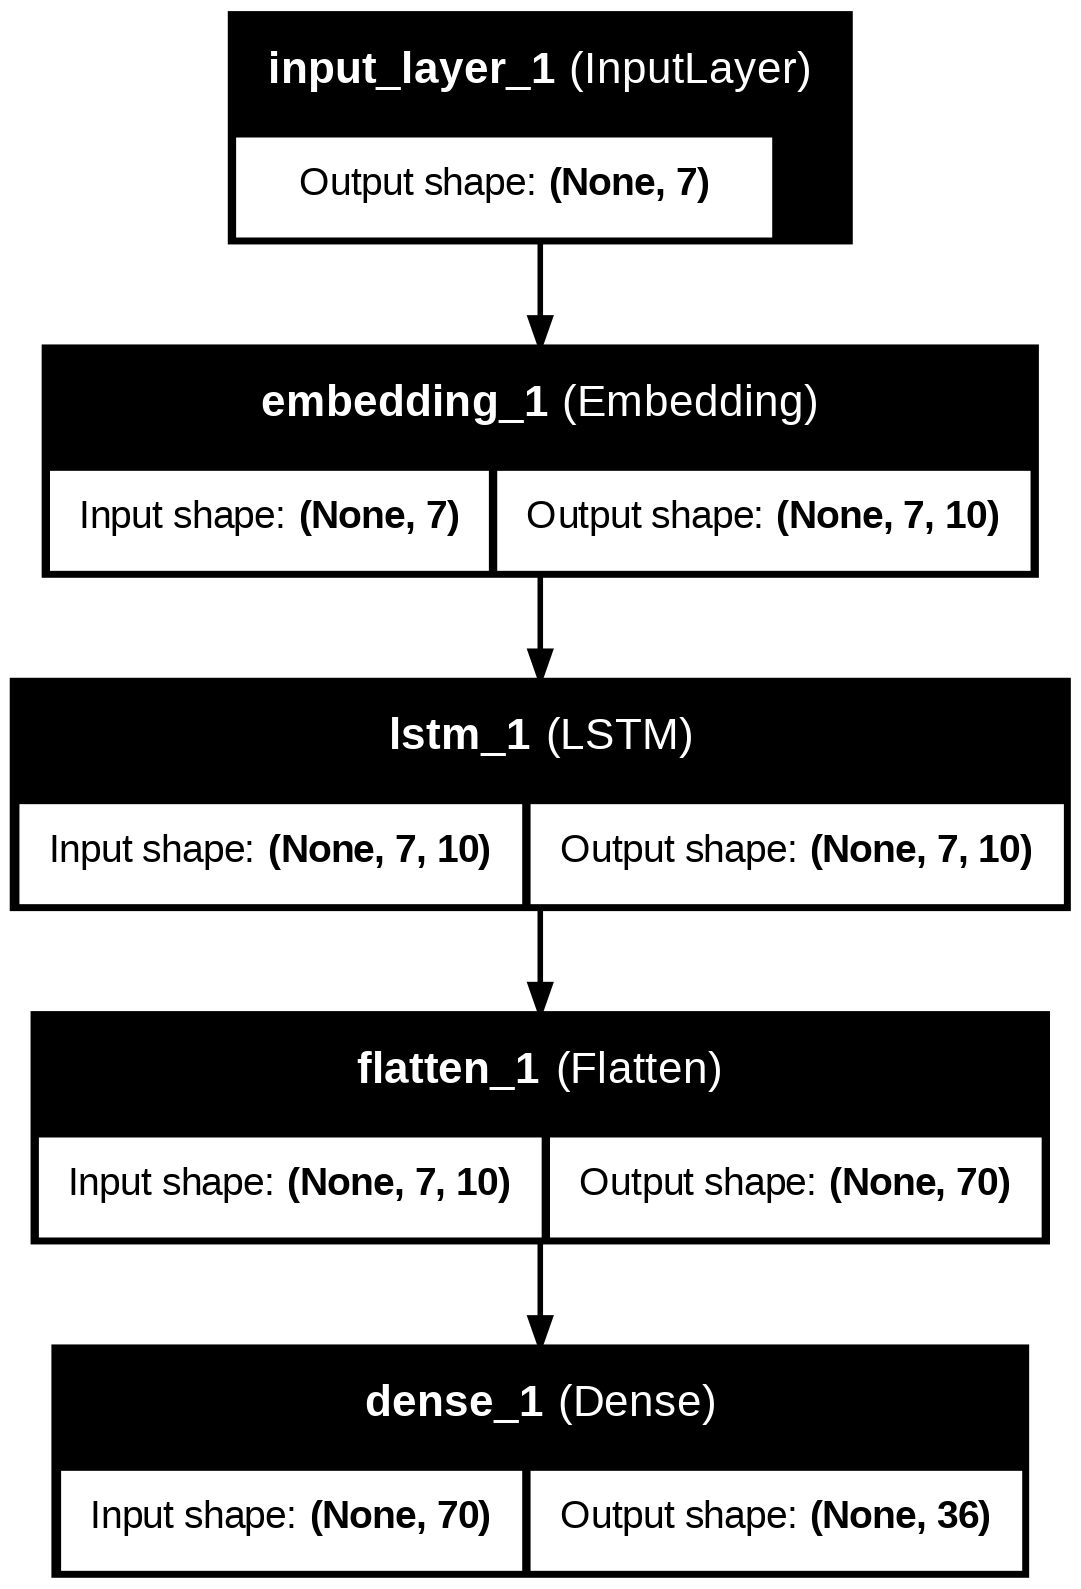

In [59]:
#menyimpan representasi visual dari model neural network yang telah Anda buat dalam format gambar.
plot_model(model, to_file='/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/model_plot.png', show_shapes=True, show_layer_names=True)

In [60]:
#menampilkan ringkasan arsitektur model neural network.
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 7, 10)               │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 7, 10)               │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,556 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,146 (16.20 KB)

 Trainable params: 4,146 (16.20 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
#proses pelatihan model neural network
train = model.fit(x_train, y_train, epochs=400)

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0512 - loss: 3.5827  
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2290 - loss: 3.5746 
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2095 - loss: 3.5690 
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2134 - loss: 3.5600 
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2303 - loss: 3.5491 
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2237 - loss: 3.5366 
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1924 - loss: 3.5296
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2042 - loss: 3.5091 
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2002 - loss: 3.4882
Epoch 10/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1885 - loss: 3.4637 
Epoch 11/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2002 - loss: 3.4250  
Epoch 12/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2042 

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0169
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0161 
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0170  
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0160 
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0171 
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0161
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0157  
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0155  
Epoch 10/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 11/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0166
Epoch 12/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000

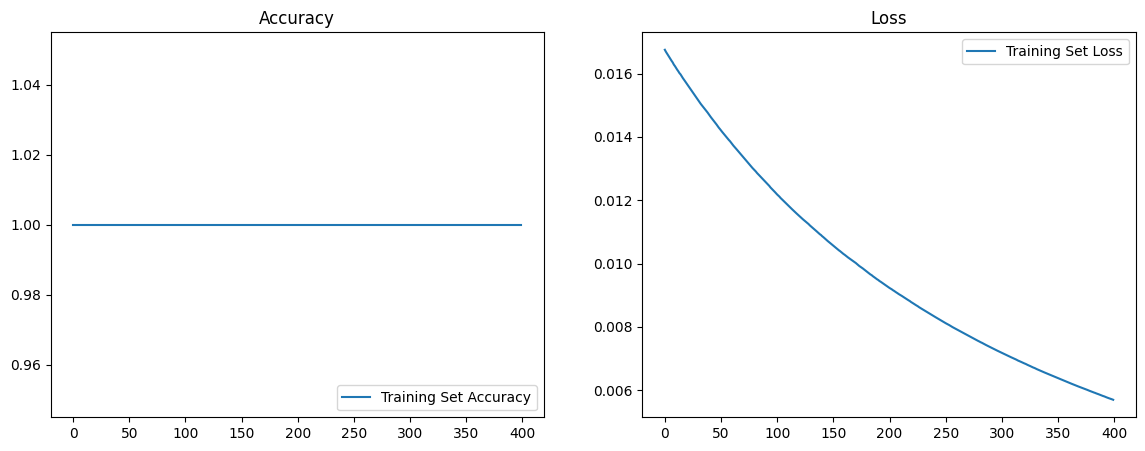

In [63]:
#proses pelatihan model neural network
history = model.fit(x_train, y_train, epochs=400)  # Assign the result to 'history'

#memvisualisasikan metrik pelatihan model selama proses pelatihan.
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label='Training Set Accuracy')  # Access history from 'history'
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Training Set Loss')  # Access history from 'history'
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
while True:
  texts_p = []
  prediction_input = input('🤵 kamu : ')

  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  prediction_input = tokenizer .texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("🤖 Dentalcarebot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')

  tts.save('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/Dentalcarebot.wav')
  time.sleep(0.08)

  ipd.display(ipd.Audio('/content/drive/MyDrive/Proyek/Natural Language Processing/Chatbot/Model/Dentalcarebot.wav', autoplay=False))
  print("="*60 + "\n")

  if response_tag == "goodbye":
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
🤖 Dentalcarebot :  Kerusakan pada lapisan gigi yang disebabkan oleh bakteri yang menghasilkan asam dari sisa makanan.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
🤖 Dentalcarebot :  Bentuk awal dari penyakit gusi yang disebabkan oleh penumpukan plak di sepanjang garis gusi.



🤵 kamu : hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
🤖 Dentalcarebot :  Hai! Dentalcarebot di sini. Mau tau informasi tentang apa nih?
